[Retour au sommaire](../index.ipynb)

# 8.3 Algorithmique : k plus proches voisins



[Retour au sommaire](../index.ipynb)

Recupération de données sur le web : https://gist.github.com/curran/a08a1080b88344b0c8a7#file-iris-csv

<ipython-input-71-5d1ac6609cc2>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


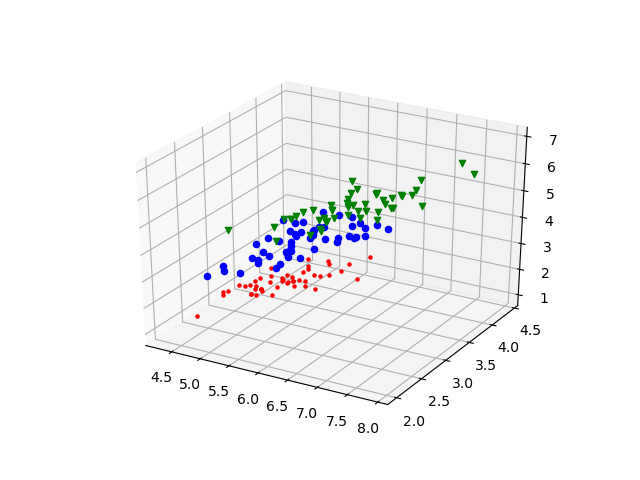

In [71]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import csv
import urllib

url = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"
response = urllib.request.urlopen(url)
lines = response.read().decode('utf-8').splitlines()
reader = csv.DictReader(lines)
fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
ax = fig.add_subplot(projection='3d')

for row in reader:
    #print(row)
    xs = float(row['sepal_length'])
    ys = float(row['sepal_width'])
    zs = float(row['petal_length'])
    specie =  row['species']
    if specie == 'setosa':
        marker = '.'
        color = 'red'
    elif specie == 'versicolor':
        marker = "o"
        color = 'blue'
    else:
        marker = "v"
        color = 'green'
    ax.scatter(xs, ys, zs, marker = marker, c=color)


plt.draw()


In [2]:
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
# Load Data
df = px.data.tips()
# Build App
app = JupyterDash(__name__)
app.layout = html.Div([
    html.H1("JupyterDash Demo"),
    dcc.Graph(id='graph'),
    html.Label([
        "colorscale",
        dcc.Dropdown(
            id='colorscale-dropdown', clearable=False,
            value='plasma', options=[
                {'label': c, 'value': c}
                for c in px.colors.named_colorscales()
            ])
    ]),
])
# Define callback to update graph
@app.callback(
    Output('graph', 'figure'),
    [Input("colorscale-dropdown", "value")]
)
def update_figure(colorscale):
    return px.scatter(
        df, x="total_bill", y="tip", color="size",
        color_continuous_scale=colorscale,
        render_mode="webgl", title="Tips"
    )
# Run app and display result inline in the notebook
#app.run_server(mode='inline')
app.run_server()

Dash app running on http://127.0.0.1:8050/


/home/yves/.local/lib/python3.8/site-packages/jupyter_dash/jupyter_app.py:139: UserWarning: The 'environ['werkzeug.server.shutdown']' function is deprecated and will be removed in Werkzeug 2.1.
  func()


In [31]:
##### import plotly.express as px
df = px.data.gapminder().query("year==2007")
fig = px.scatter(df, y="lifeExp", x="gdpPercap", hover_name='country', color="continent", size="pop",size_max=60, height=600)
fig.show("json")

In [35]:
import plotly.express as px
df = px.data.election()
fig = px.scatter_3d(df, x="Joly", y="Coderre", z="Bergeron", color="winner", size="total", hover_name="district")
fig.show()

In [36]:
import plotly.express as px
df = px.data.iris()
df["e"] = df["sepal_width"]/100
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species", error_x="e", error_y="e")
fig.show()

In [38]:
import plotly.graph_objects as go

import networkx as nx

G = nx.random_geometric_graph(200, 0.125)

In [39]:
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

In [40]:
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph made with Python',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: <a href='https://plotly.com/ipython-notebooks/network-graphs/'> https://plotly.com/ipython-notebooks/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

https://snap.stanford.edu/